# Initialize the library

In [37]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [38]:
import os
print(os.getcwd())


/Users/sohanurrahman/Desktop/College/Workshop/Introduction_to_Machine_Learning


In [39]:
# Define the paths for training and validation datasets
train_dir = 'Rock-Paper-Scissors/train'
validation_dir = 'Rock-Paper-Scissors/test'

# Create ImageDataGenerator for data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize pixel values between 0 and 1
    rotation_range=20,   # Randomly rotate images
    width_shift_range=0.2,  # Randomly shift images horizontally
    height_shift_range=0.2,  # Randomly shift images vertically
    shear_range=0.2,     # Randomly apply shearing
    zoom_range=0.2,      # Randomly zoom images
    horizontal_flip=True  # Randomly flip images horizontally
)

validation_datagen = ImageDataGenerator(rescale=1.0/255.0)  # Only rescale for validation

# Load training dataset
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(300, 300),  # Ensure this matches your model's input size
    batch_size=32,
    class_mode='categorical'
)

# Load validation dataset
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(300, 300),
    batch_size=32,
    class_mode='categorical'
)



Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


# Showing some sample dataset

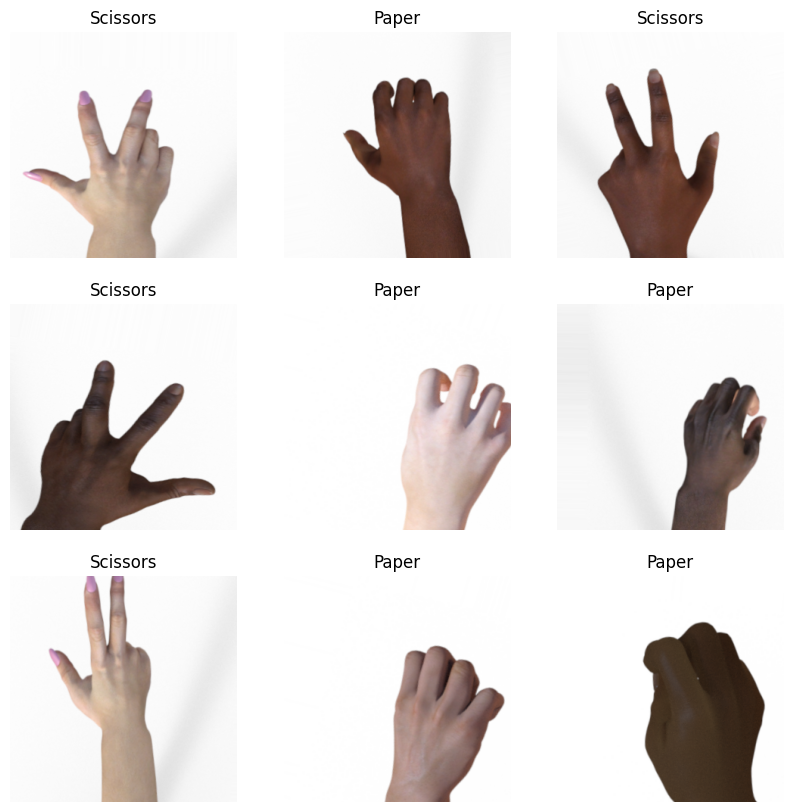

In [40]:
# Get a batch of images and labels
sample_images, sample_labels = next(train_generator)

# Plot a few samples with their corresponding labels
class_names = ['Rock', 'Paper', 'Scissors']  # Assuming these are the labels

plt.figure(figsize=(10, 10))
for i in range(9):  # Displaying 9 samples
    plt.subplot(3, 3, i+1)
    plt.imshow(sample_images[i])
    plt.title(class_names[np.argmax(sample_labels[i])])
    plt.axis('off')
plt.show()

In [41]:
from tensorflow.keras import models
from tensorflow.keras.layers import Dense, Flatten, Dropout

# Define a simpler Sequential model
# model = models.Sequential()

# # Convolutional layer with fewer filters and pooling
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 3)))
# model.add(layers.MaxPooling2D((2, 2)))

# # Another convolutional layer
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))

# # Flatten the output before passing to fully connected layers
# model.add(layers.Flatten())

# # Fully connected layer (Dense layer)
# model.add(layers.Dense(64, activation='relu'))

# # Output layer for 3 classes (rock, paper, scissors)
# model.add(layers.Dense(3, activation='softmax'))

model = models.Sequential()
model.add(Flatten(input_shape=(300, 300, 3)))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()



/Users/sohanurrahman/Desktop/College/Workshop/Introduction_to_Machine_Learning/venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)             │ (None, 270000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1024)           │   276,481,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 277,137,923 (1.03 GB)

 Trainable params: 277,137,923 (1.03 GB)

 Non-trainable params: 0 (0.00 B)

In [42]:

history = model.fit(
    train_generator,  # Use the generator for training data
    validation_data=validation_generator,  # Use the generator for validation data
    epochs=3,
    verbose=1
)

/Users/sohanurrahman/Desktop/College/Workshop/Introduction_to_Machine_Learning/venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
79/79 ━━━━━━━━━━━━━━━━━━━━ 72s 876ms/step - accuracy: 0.3427 - loss: 178.1427 - val_accuracy: 0.3333 - val_loss: 4.3009
Epoch 2/3
79/79 ━━━━━━━━━━━━━━━━━━━━ 63s 785ms/step - accuracy: 0.3192 - loss: 3.5567 - val_accuracy: 0.3333 - val_loss: 1.0986
Epoch 3/3
79/79 ━━━━━━━━━━━━━━━━━━━━ 65s 820ms/step - accuracy: 0.3233 - loss: 1.7995 - val_accuracy: 0.3333 - val_loss: 1.0986


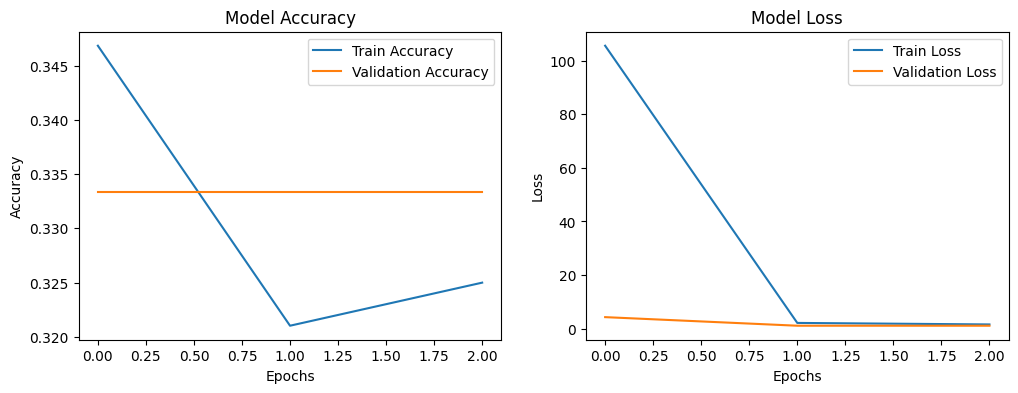

In [43]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()